In [1]:
import pandas as pd

# Step 1: Load the data from the CSV file
file_path = 'diabetesunclean.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 2: Identify the last column by using the column index
last_column = df.columns[-1]

# Step 3: Replace 0 with -1 in the last column (adjust this as needed)
df[last_column] = df[last_column].replace({0: -1, 1: 1})

# Step 4: Move the last column to the first position
# Use df.pop to remove the last column and insert it as the first column
df.insert(0, last_column, df.pop(last_column))

# Step 5: Save the updated DataFrame to a new CSV file
output_file_path = 'cleandiabetes.csv'  # Define the output path
df.to_csv(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")


Data successfully saved to cleandiabetes.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Counts of Outcome (1 and -1):
Outcome
-1    500
 1    268
Name: count, dtype: int64


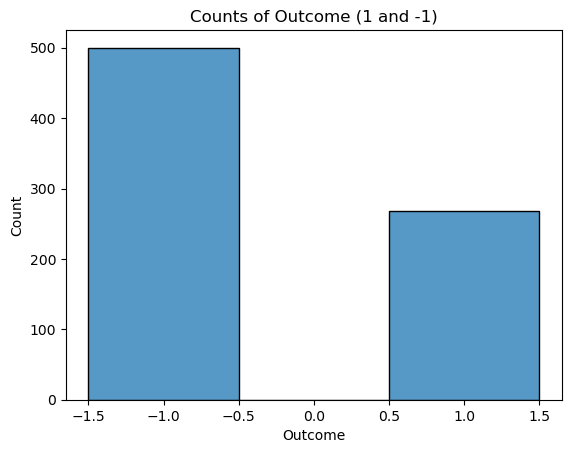

In [3]:
outcome_counts = df['Outcome'].value_counts()

# Print the counts of each outcome value
print("Counts of Outcome (1 and -1):")
print(outcome_counts)

# Plot the histogram for Outcome counts (-1 and 1)
sns.histplot(df['Outcome'], bins=2, discrete=True)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Outcome (1 and -1)')
plt.show()

In [4]:
import pandas as pd
df_outcomes = df.iloc[:, 0]  # First column as Outcome
df_outcomes.name = 'Outcome'

# Step 3: Extract the remaining columns as features
df_features = df.iloc[:, 1:]  # All columns except the first as features

# Step 4: Concatenate outcomes with features to form a complete dataset
df = pd.concat([df_outcomes, df_features], axis=1)

# Show summary statistics
print(df.describe())

# Verify if there are any NaN values left
print(df.isna().sum())

# Display DataFrame info
print(df.info())


          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean    -0.302083     3.845052  120.894531      69.105469      20.536458   
std      0.953903     3.369578   31.972618      19.355807      15.952218   
min     -1.000000     0.000000    0.000000       0.000000       0.000000   
25%     -1.000000     1.000000   99.000000      62.000000       0.000000   
50%     -1.000000     3.000000  117.000000      72.000000      23.000000   
75%      1.000000     6.000000  140.250000      80.000000      32.000000   
max      1.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min      0.000000    0.000000      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Outcome,768.0,-0.302083,0.953903,-1.000,-1.00000,-1.0000,1.00000,1.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


array([[<Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

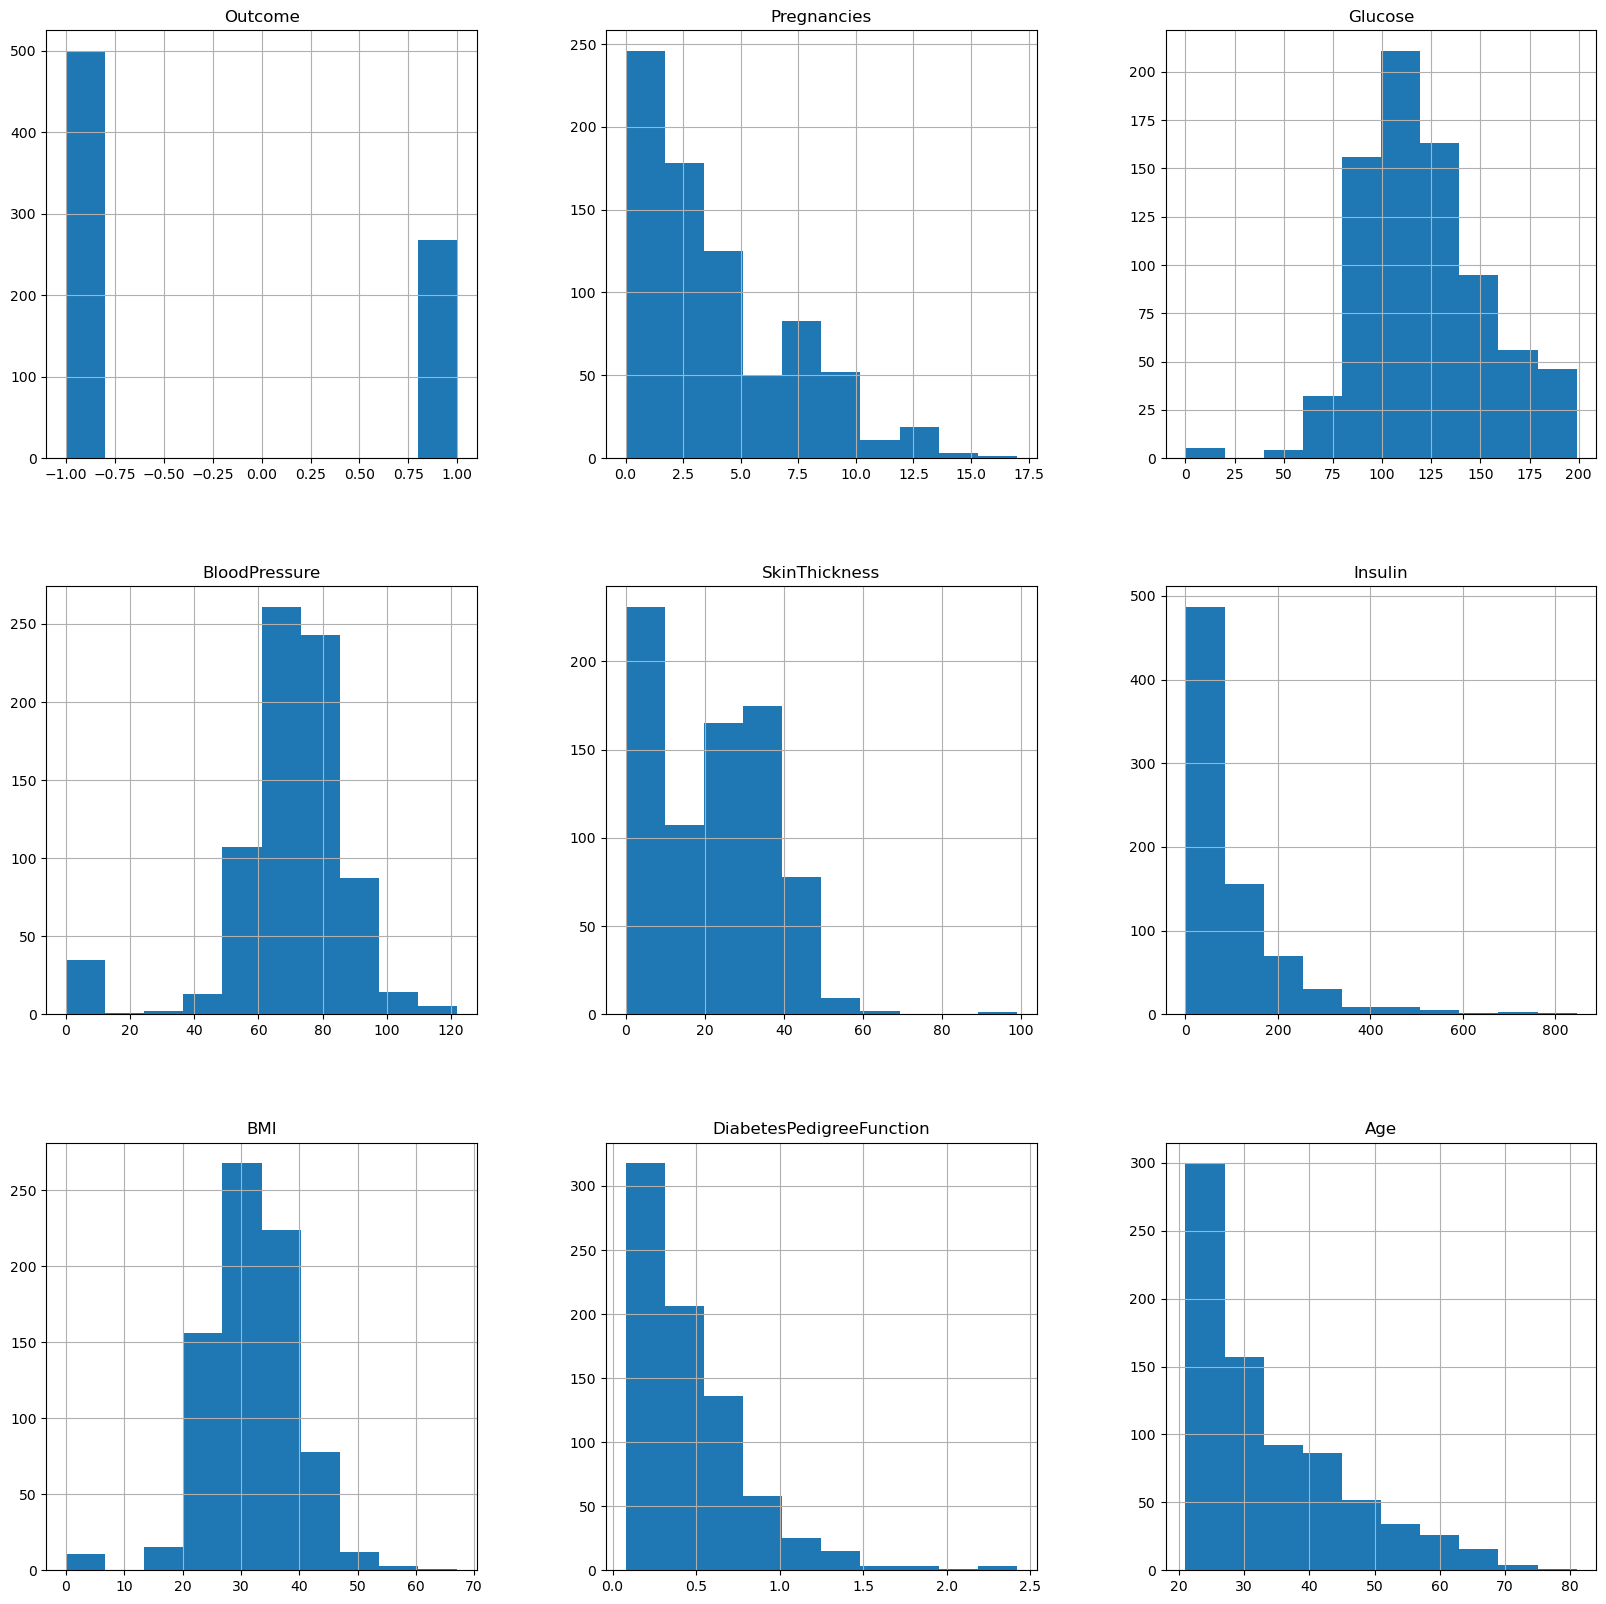

In [6]:
df.hist(figsize=(20,20))

          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean    -0.302083     0.169010    0.094413      -0.160807      -0.076986   
std      0.953903     0.673916    0.775094       1.075323       0.498507   
min     -1.000000    -0.600000   -2.836364      -4.000000      -0.718750   
25%     -1.000000    -0.400000   -0.436364      -0.555556      -0.718750   
50%     -1.000000     0.000000    0.000000       0.000000       0.000000   
75%      1.000000     0.600000    0.563636       0.444444       0.281250   
max      1.000000     2.800000    1.987879       2.777778       2.375000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean     0.387422   -0.000798                  0.259807    0.249464  
std      0.905650    0.847759                  0.866219    0.691778  
min     -0.239686   -3.440860      

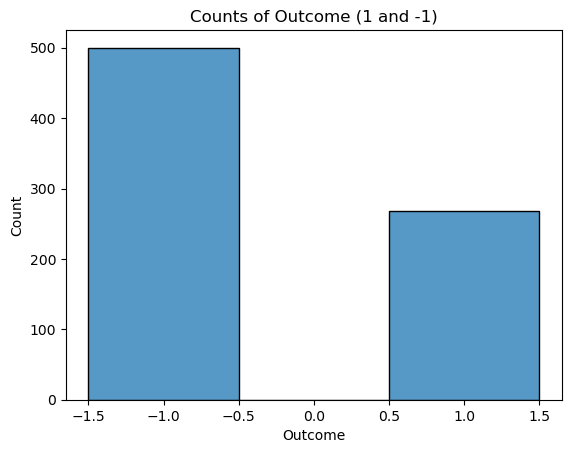

In [7]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define and apply RobustScaler to the features
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Step 2: Concatenate scaled features with outcomes
df_scaled = pd.concat([df_outcomes, X_scaled], axis=1)

# Step 3: Show summary statistics of the scaled dataset
print(df_scaled.describe())

# Step 4: Verify if there are any NaN values left
print(f"'NA quantity:' {df_scaled.isna().sum()}")

# Step 5: Print dataset info
print(df_scaled.info())

# Step 6: Optionally, you can plot the histogram for Outcome counts
sns.histplot(df_scaled['Outcome'], bins=2, discrete=True)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Outcome (1 and -1)')
plt.show()


In [8]:

outcome_counts = df_scaled['Outcome'].value_counts()

# Print the counts of each outcome value
print("Counts of Outcome (1 and -1):")
print(outcome_counts)

Counts of Outcome (1 and -1):
Outcome
-1    500
 1    268
Name: count, dtype: int64


array([[<Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

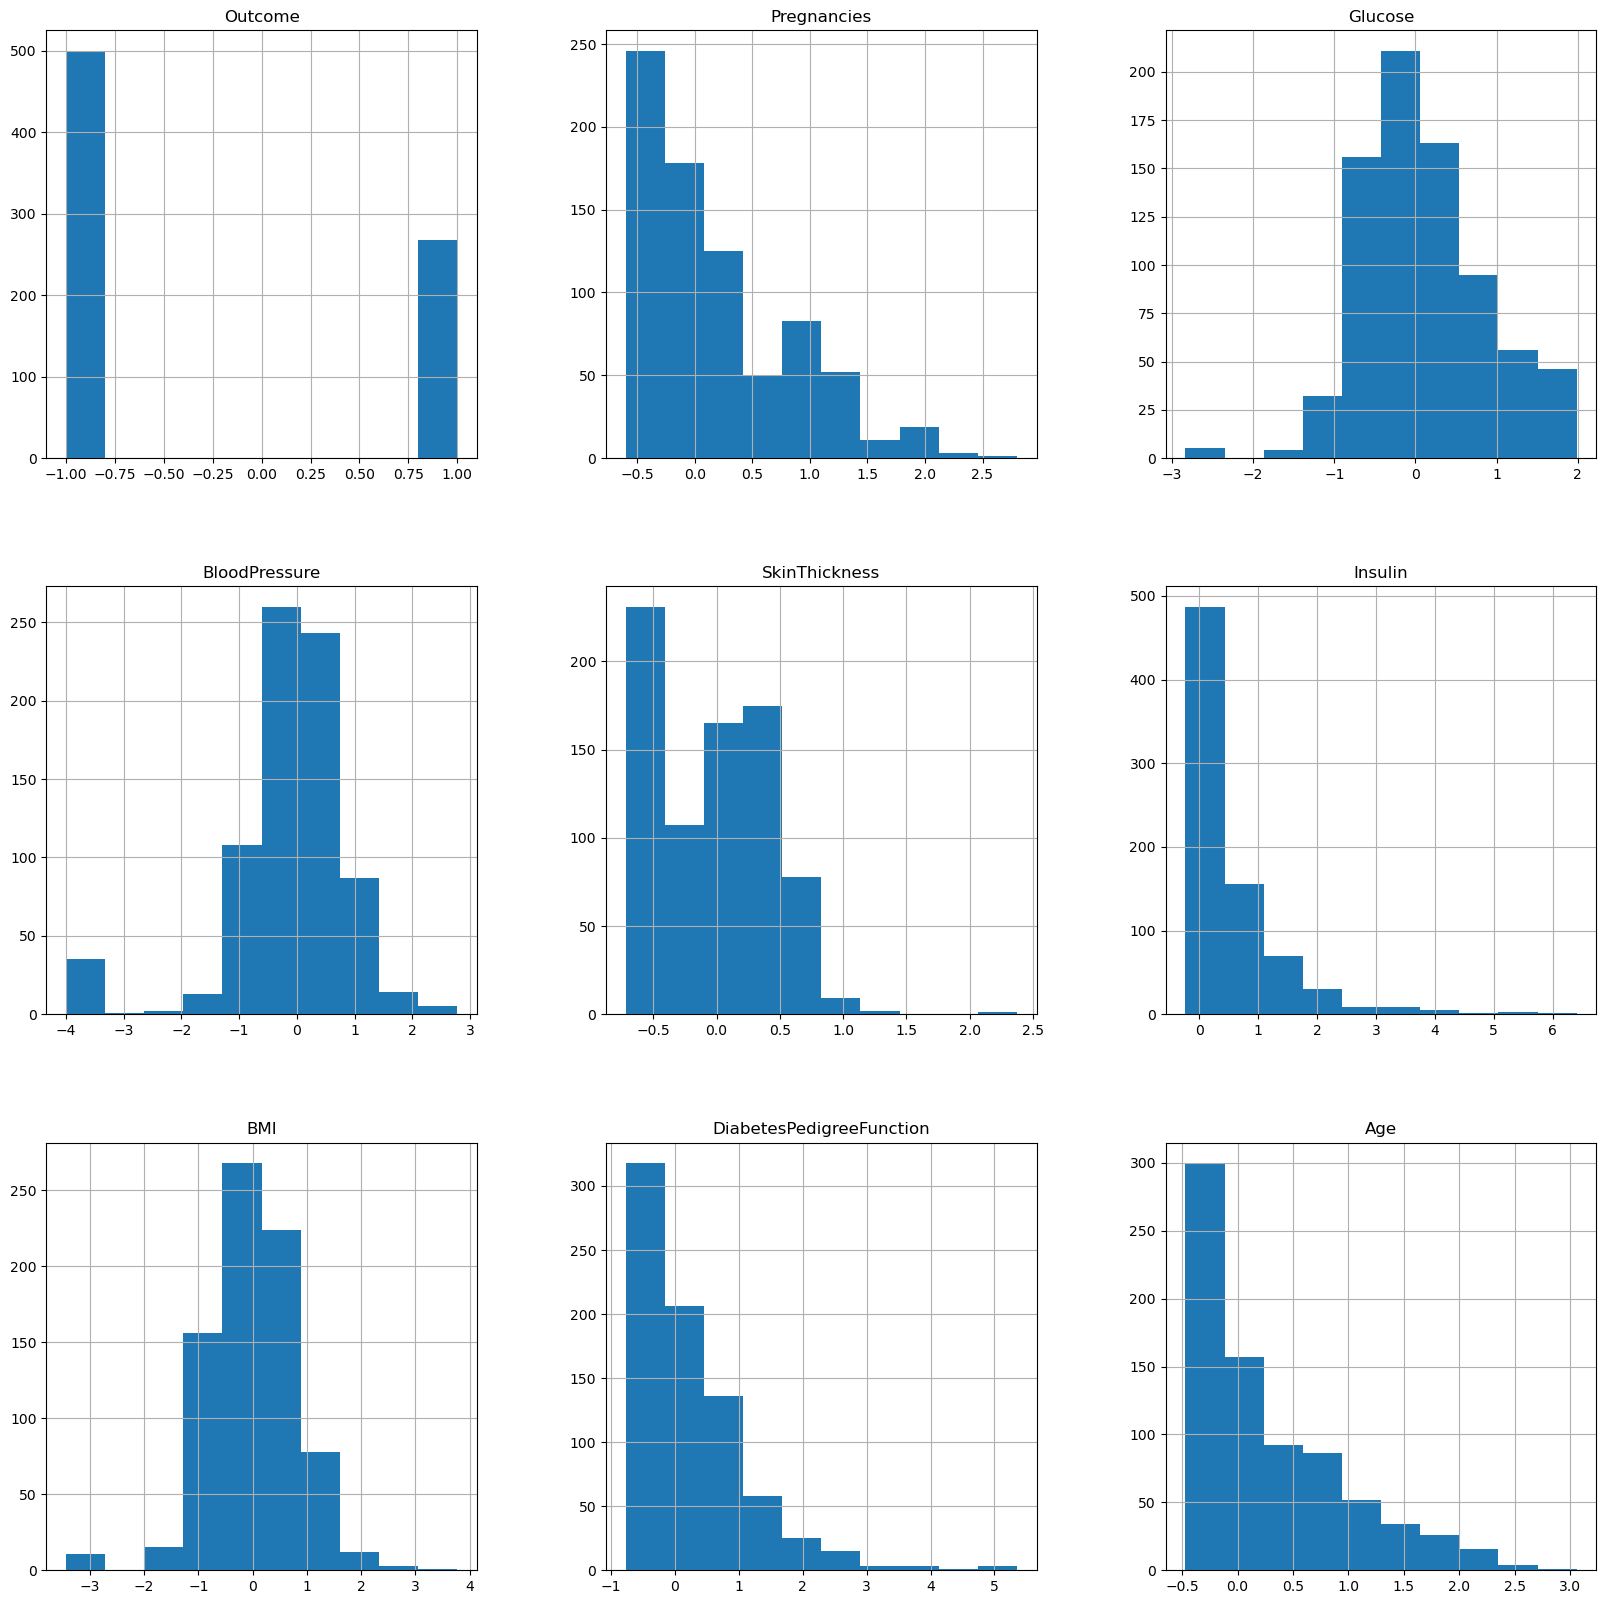

In [9]:
df_scaled.hist(figsize=(20,20))

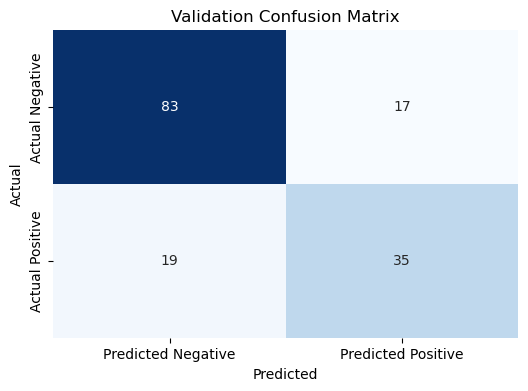

Baseline Model Results
Val Accuracy: 0.7662337662337663
Precision: 0.6731
Recall: 0.6481
False Negative Rate (FNR): 0.3519


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

#Inital Model
# Split features and labels 
X = df_scaled.iloc[:, 1:]  # Features 
y = df_scaled.iloc[:, 0]   # Labels 

# First split: Split the dataset into train+validation and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: Split the train+validation set into train and validation sets (75% train, 25% validation of the original train+val set)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


# Train a Perceptron model using training data
clf = Perceptron()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Baseline Model Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

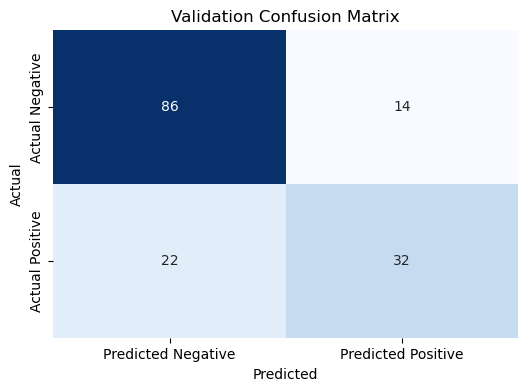

Model 2 Results
Val Accuracy: 0.7662337662337663
Precision: 0.6957
Recall: 0.5926
False Negative Rate (FNR): 0.4074


In [11]:

# Initialize the Perceptron model with class weights
perceptron2 = Perceptron(max_iter=1000, eta0=1, random_state = 0, class_weight='balanced')

# Train the model using training data
perceptron2.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron2.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 2 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

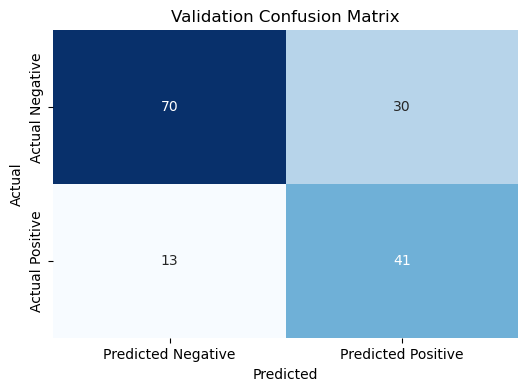

Model 3 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5775
Recall: 0.7593
False Negative Rate (FNR): 0.2407


In [12]:

# Initialize the Perceptron model with class weights
perceptron3 = Perceptron(max_iter=1000, eta0=1, random_state = 42, class_weight=None)

# Train the model using training data
perceptron3.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron3.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 3 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

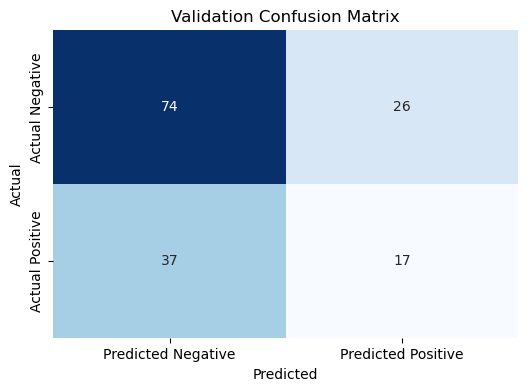

Model 4 Results
Val Accuracy: 0.5909090909090909
Precision: 0.3953
Recall: 0.3148
False Negative Rate (FNR): 0.6852


In [13]:
# Initialize the Perceptron model with class weights
perceptron4 = Perceptron(max_iter=1000, eta0=1, random_state = 36, class_weight=None)

# Train the model using training data
perceptron4.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron4.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 4 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

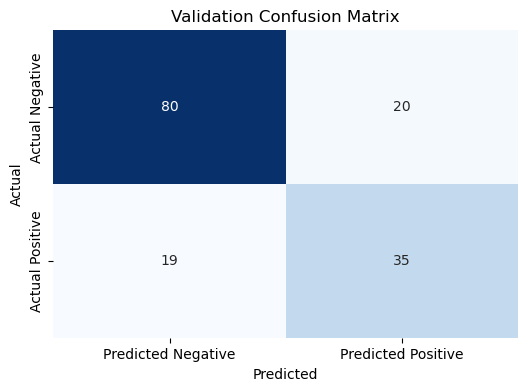

Model 5 Results
Val Accuracy: 0.7467532467532467
Precision: 0.6364
Recall: 0.6481
False Negative Rate (FNR): 0.3519


In [14]:
# Initialize the Perceptron model with class weights
perceptron5 = Perceptron(max_iter=1000, eta0=1, random_state = 24, class_weight=None)

# Train the model using training data
perceptron5.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron5.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 5 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

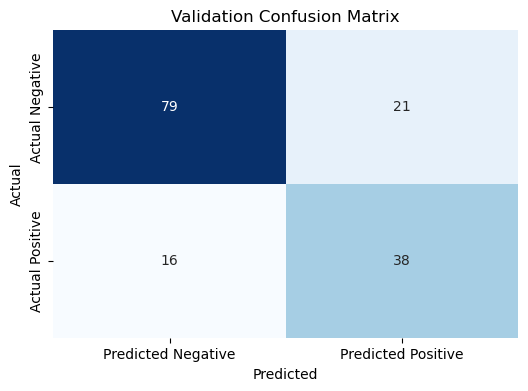

Model 6 Results
Val Accuracy: 0.7597402597402597
Precision: 0.6441
Recall: 0.7037
False Negative Rate (FNR): 0.2963


In [15]:
# Initialize the Perceptron model with class weights
perceptron6 = Perceptron(max_iter=1000, eta0=1, random_state = 12, class_weight=None)

# Train the model using training data
perceptron6.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron6.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 6 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

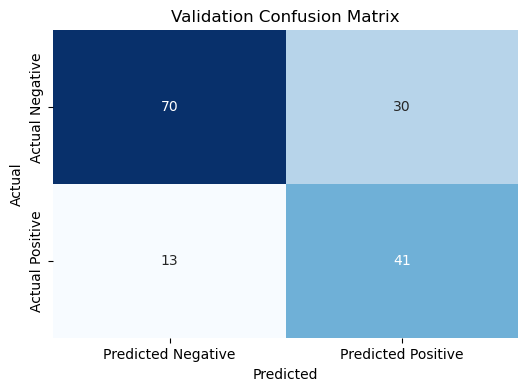

Model 7 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5775
Recall: 0.7593
False Negative Rate (FNR): 0.2407


In [16]:
# Initialize the Perceptron model with class weights
perceptron7 = Perceptron(max_iter=1000, eta0=0.1, random_state = 42, class_weight=None)

# Train the model using training data
perceptron7.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron7.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 7 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

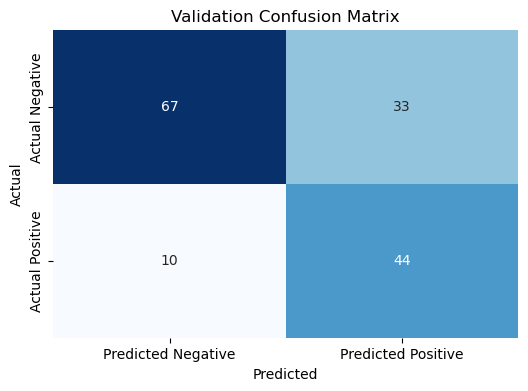

Model 8 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5714
Recall: 0.8148
False Negative Rate (FNR): 0.1852


In [17]:
# Initialize the Perceptron model with class weights
perceptron8 = Perceptron(max_iter=1000, eta0=0.01, random_state = 42, class_weight=None)

# Train the model using training data
perceptron8.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron8.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 8 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

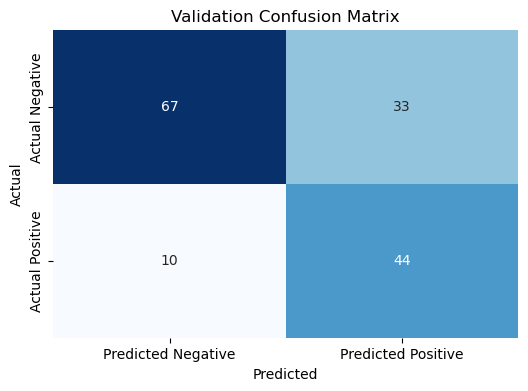

Model 9 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5714
Recall: 0.8148
False Negative Rate (FNR): 0.1852


In [18]:
# Initialize the Perceptron model with class weights
perceptron9 = Perceptron(max_iter=1000, eta0=0.001, random_state = 42, class_weight=None)

# Train the model using training data
perceptron9.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron9.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 9 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

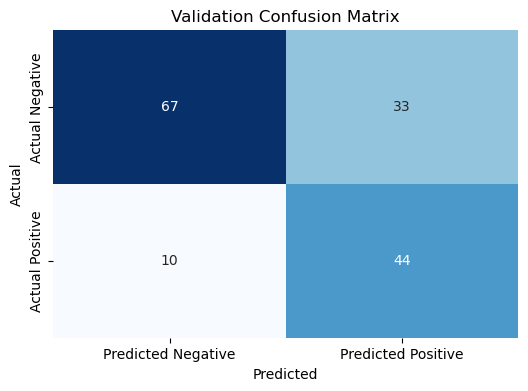

Model 10 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5714
Recall: 0.8148
False Negative Rate (FNR): 0.1852


In [19]:
# Initialize the Perceptron model with class weights
perceptron10 = Perceptron(max_iter=1000, eta0=0.0001, random_state = 42, class_weight=None)

# Train the model using training data
perceptron10.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron10.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 10 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

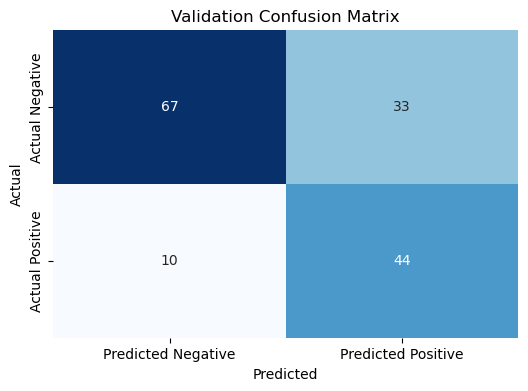

Model 11 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5714
Recall: 0.8148
False Negative Rate (FNR): 0.1852


In [20]:
# Initialize the Perceptron model with class weights
perceptron11 = Perceptron(max_iter=10000, eta0=0.01, random_state = 42, class_weight=None)

# Train the model using training data
perceptron11.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron11.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 11 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

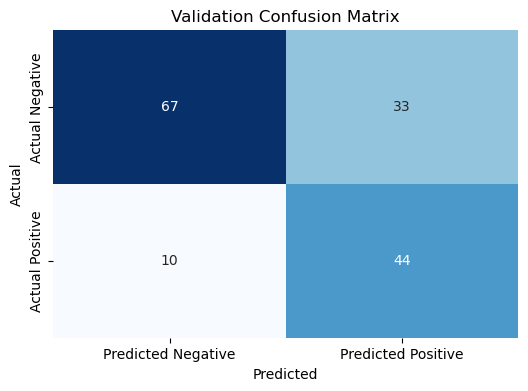

Model 12 Results
Val Accuracy: 0.7207792207792207
Precision: 0.5714
Recall: 0.8148
False Negative Rate (FNR): 0.1852


In [21]:
# Initialize the Perceptron model with class weights
perceptron12 = Perceptron(max_iter=10, eta0=0.01, random_state = 42, class_weight=None)

# Train the model using training data
perceptron12.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron12.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 12 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

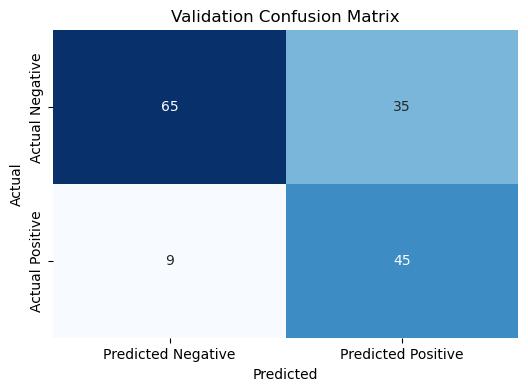

Model 13 Results
Val Accuracy: 0.7142857142857143
Precision: 0.5625
Recall: 0.8333
False Negative Rate (FNR): 0.1667


In [22]:
# Initialize the Perceptron model with class weights
perceptron13 = Perceptron(max_iter=10, eta0=0.01, random_state = 42, class_weight='balanced')

# Train the model using training data
perceptron13.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron13.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 13 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

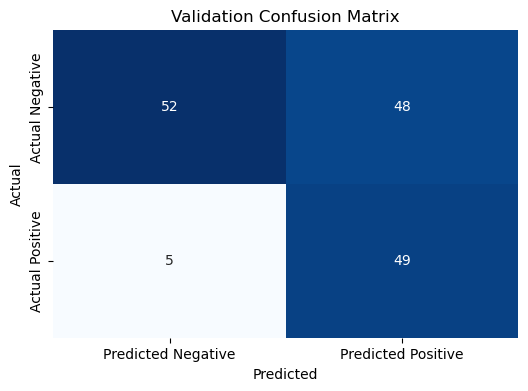

Model 14 Results
Val Accuracy: 0.6558441558441559
Precision: 0.5052
Recall: 0.9074
False Negative Rate (FNR): 0.0926


In [23]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = {1: 5, -1: 1} 

# Initialize the Perceptron model with class weights
perceptron14 = Perceptron(max_iter=1000,  eta0=0.01, random_state = 42, class_weight=class_weights)

# Train the model using training data
perceptron14.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron14.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 14 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

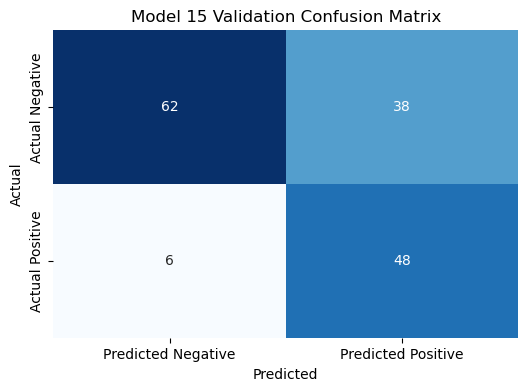

Model 15 Results
Val Accuracy: 0.7142857142857143
Precision: 0.5581
Recall: 0.8889
False Negative Rate (FNR): 0.1111


In [24]:
# Calculate class weights
class_weights = {1: 4, -1: 1} 

# Initialize the Perceptron model with class weights
perceptron15 = Perceptron(max_iter=1000,  eta0=0.01, random_state = 42, class_weight=class_weights)

# Train the model using training data
perceptron15.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron15.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model 15 Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 15 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

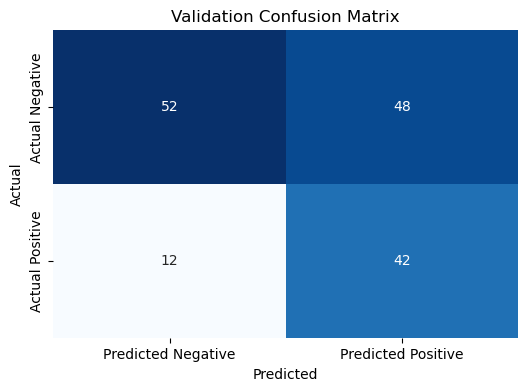

Model 16 Results
Val Accuracy: 0.6103896103896104
Precision: 0.4667
Recall: 0.7778
False Negative Rate (FNR): 0.2222


In [25]:
# Calculate class weights
class_weights = {1: 3, -1: 1} 

# Initialize the Perceptron model with class weights
perceptron16 = Perceptron(max_iter=1000,  eta0=0.01, random_state = 42, class_weight=class_weights)

# Train the model using training data
perceptron16.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron16.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 16 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

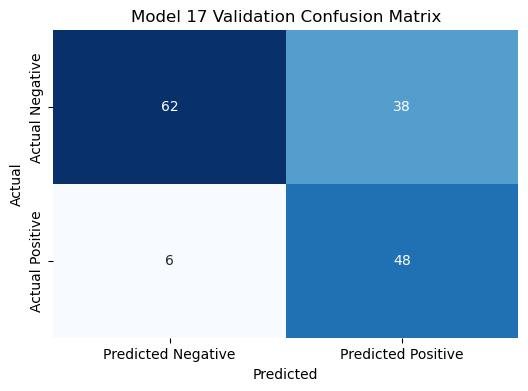

Model 17 Results
Val Accuracy: 0.7142857142857143
Precision: 0.5581
Recall: 0.8889
False Negative Rate (FNR): 0.1111


In [26]:
# Calculate class weights
class_weights = {1: 2, -1: 1} 

# Initialize the Perceptron model with class weights
perceptron17 = Perceptron(max_iter=1000,  eta0=0.01, random_state = 42, class_weight=class_weights)

# Train the model using training data
perceptron17.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron17.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model 17 Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 17 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

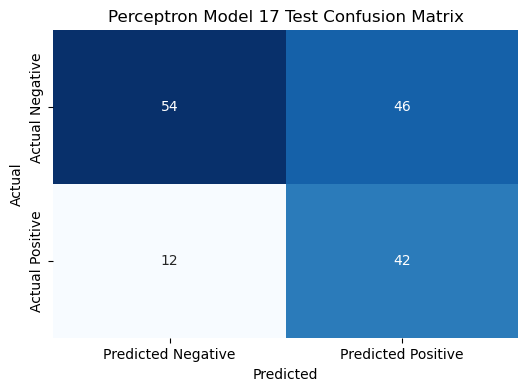

Perceptron Model 17 - Test Data
Test Accuracy: 0.6234
Test Precision: 0.4773
Test Recall: 0.7778
Test False Negative Rate (FNR): 0.2222


In [27]:
# Make predictions on the test set
y_test_pred = perceptron17.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a blue grid for the test set
plt.figure(figsize=(6,4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Perceptron Model 17 Test Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR) for the test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_fnr = test_cm[1, 0] / (test_cm[1, 0] + test_cm[1, 1]) 

# Print test results
print(f"Perceptron Model 17 - Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test False Negative Rate (FNR): {test_fnr:.4f}")
